## Simple EDA on Scraped Grocery Data
Welcome to an in-depth exploration of grocery data in this notebook! We'll delve into a dataset that focuses solely on groceries, keeping our analysis practical and down-to-earth. Our goal is to uncover fundamental trends and patterns in this straightforward grocery dataset. Specifically, we'll address the following questions:

- What is the distribution of prices across different grocery categories?
- Are there any outliers in product prices, and if so, can we identify and address them?
- How does the quantity of products vary within each category?

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Load the dataset from CSV
df = pd.read_csv('products_data.csv')

In [62]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name              0
Current Price     0
Previous Price    0
Price Per Each    0
Category          0
Product ID        0
Product URL       0
Amount            0
Units             0
dtype: int64


This indicates the dataset is complete, and there are no missing data points in it.

In [63]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              Name Current Price Previous Price Price Per Each        Category  \
count       17259         17259          17259          17259           17259   
unique      13147           817            829           1527             118   
top     Soy Sauce          4.99           4.99     $1.50/100g  Chips & Snacks   
freq           17           823            823            189             951   

         Product ID                                        Product URL Amount  \
count         17259                                              17259  17259   
unique        14423                                              14423    982   
top     21190251_EA  https://www.realcanadiansuperstore.ca/apples-c...      1   
freq             14                                                 14   1513   

        Units  
count   17259  
unique     12  
top         g  
freq    10792  


count: This is the count of non-null values for each column. In your case, there are 17,259 non-null values for each column, indicating that there are no missing values.

unique: This is the number of unique values in each column. For example, in the 'Name' column, there are 13,147 unique product names.

top: This is the most frequently occurring value in each column. For example, in the 'Name' column, 'Soy Sauce' appears most frequently, occurring 17 times.

freq: This is the frequency of the most frequently occurring value. For example, in the 'Name' column, 'Soy Sauce' appears 17 times, which is the highest frequency.

In [64]:
df['Current Price'] = df['Current Price'].str.replace(',', '')
df['Previous Price'] = df['Previous Price'].str.replace(',', '')

To refine our analysis, we should consider removing outliers, as some products exhibit exceptionally high prices compared to the majority. Let's proceed with the essential steps of calculating the Interquartile Range (IQR) and identifying these outliers:

In [65]:
df['Current Price'] = pd.to_numeric(df['Current Price'], errors='coerce')

# Calculate the IQR for the 'Current Price' column
Q1 = df['Current Price'].quantile(0.25)
Q3 = df['Current Price'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for identifying outliers
lower_bound = Q1 - 25 * IQR
upper_bound = Q3 + 25 * IQR

# Identify and remove outliers
outliers = df[(df['Current Price'] < lower_bound) | (df['Current Price'] > upper_bound)]
df = df[~((df['Current Price'] < lower_bound) | (df['Current Price'] > upper_bound))]
print(outliers)


                                         Name  Current Price Previous Price  \
7787                      Frozen Turkey 5-7kg         600.36         600.36   
7877                          Beef Tenderloin         213.15         213.15   
8402           Coho Steaks, Previously Frozen         394.23         394.23   
8404  Pacific Wild Coho Salmon, Whole Dressed        1449.99        1449.99   
8417     Whole Pink Salmon, Previously Frozen         809.99         809.99   

     Price Per Each          Category   Product ID  \
7787    $100.06/1kg  Chicken & Turkey  20118435_KG   
7877     $66.12/1kg              Beef  20771237_KG   
8402    $999.99/1kg            Salmon  20964475_KG   
8404    $999.99/1kg            Salmon  20684527_KG   
8417    $999.99/1kg            Salmon  21347725_KG   

                                            Product URL Amount Units  
7787  https://www.realcanadiansuperstore.ca/frozen-t...      1    ea  
7877  https://www.realcanadiansuperstore.ca/beef-ten...   

Due to the dataset's extensive list of categories (over 100), we will group them into broader main categories to simplify our plotting and gain clearer insights.

In [66]:
# Get unique categories and convert to a list
unique_category = df['Category'].drop_duplicates(inplace=False).tolist()

# Initialize an empty list to store category group labels
category_group_list = []

# Loop through each category in the 'Category' column
for x in df['Category'].tolist():
    # Check which category group it belongs to based on its position in unique_category list
    if x in unique_category[:7]:
        category_group_list.append('Fruits & Vegetables')
    elif x in unique_category[7:16]:
        category_group_list.append('Dairy & Eggs')
    elif x in unique_category[16:29]:
        category_group_list.append('Pantry')
    elif x in unique_category[29:50]:
        category_group_list.append('International Foods')
    elif x in unique_category[50:57]:
        category_group_list.append('Meat')
    elif x in unique_category[57:64]:
        category_group_list.append('Fish & Seafood')
    elif x in unique_category[64:68]:
        category_group_list.append('Snacks, Chips & Candy')
    elif x in unique_category[68:77]:
        category_group_list.append('Drinks')
    elif x in unique_category[77:86]:
        category_group_list.append('Frozen')
    elif x in unique_category[86:95]:
        category_group_list.append('Natural and Organic Foods')
    elif x in unique_category[95:102]:
        category_group_list.append('Deli')
    elif x in unique_category[102:108]:
        category_group_list.append('Bakery')
    elif x in unique_category[108:]:
        category_group_list.append('Prepared Meals')
        
# Add the 'Category Group' column to the DataFrame with the assigned labels
df['Category Group'] = category_group_list

In [67]:
df.head() #Preview

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units,Category Group
0,English Cucumber,1.99,1.99,$1.99/1ea,Fresh Vegetables,20070132001_EA,https://www.realcanadiansuperstore.ca/english-...,1,ea,Fruits & Vegetables
1,Green Onion,1.29,1.29,$1.29/1ea,Fresh Vegetables,20107500001_EA,https://www.realcanadiansuperstore.ca/green-on...,1,bunch,Fruits & Vegetables
2,"Bi-Colour Corn, Corn on the Cob",0.99,0.99,$0.99/1ea,Fresh Vegetables,20131170001_EA,https://www.realcanadiansuperstore.ca/bi-colou...,1,ea,Fruits & Vegetables
3,"Romaine Heart, 3 Pack",6.00,6.00,$2.00/1ea,Fresh Vegetables,20067389001_EA,https://www.realcanadiansuperstore.ca/romaine-...,3,pack,Fruits & Vegetables
4,Red Peppers,2.38,2.38,$9.90/1kg,Fresh Vegetables,20007535001_KG,https://www.realcanadiansuperstore.ca/red-pepp...,1,ea,Fruits & Vegetables


Now that we have categorized the items into distinct groups, we can proceed to create boxplots for each group. These boxplots will help us identify if any particular group exhibits a significantly different price range compared to the others. Let's visualize these comparisons in the following plot:

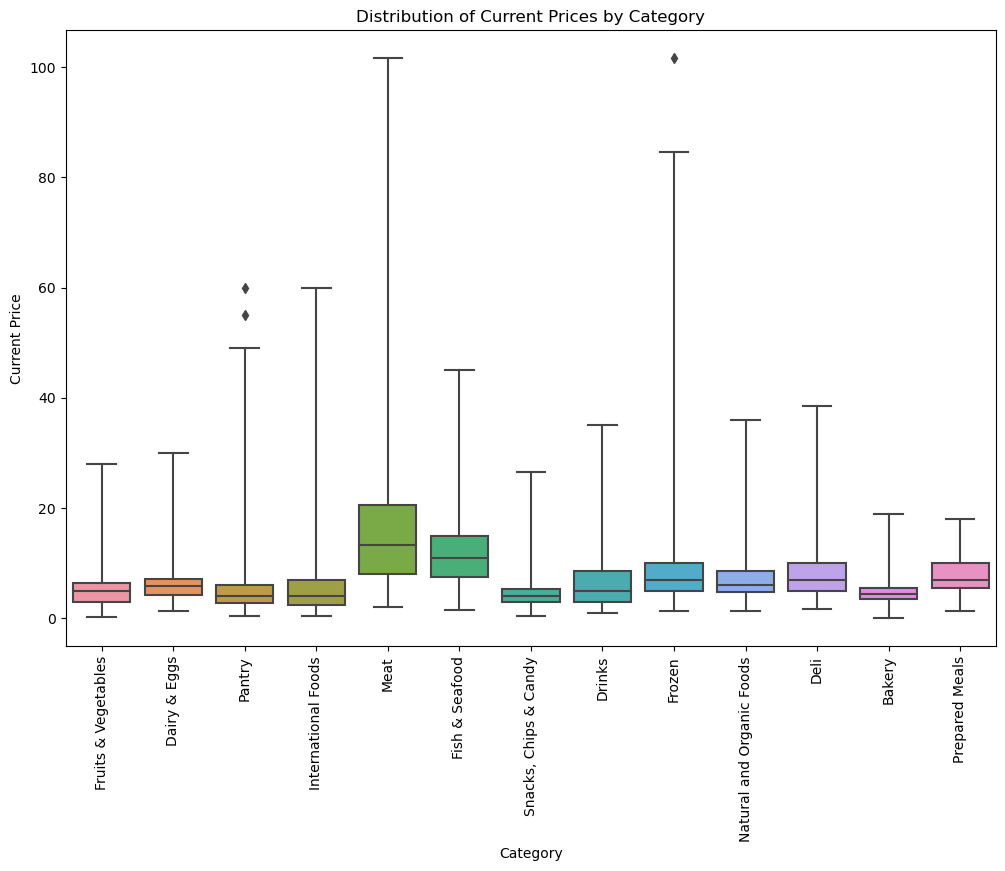

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category Group', y='Current Price', data=df, whis=15)
plt.xticks(rotation=90)  
plt.title('Distribution of Current Prices by Category')
plt.xlabel('Category')
plt.ylabel('Current Price')
plt.show()

As observed in the boxplot chart above, the Meat category stands out as one of the highest-priced categories within the superstore. Additionally, we notice that the Frozen category exhibits a broad spectrum of prices. It's worth noting that these observations align with our expectations, as categories like Frozen may include frozen meat products as well, contributing to the variability in prices within the Frozen category.

Overall, the majority of items across various categories appear to have an average price range between 5 to 15 dollars, as visually depicted in the plot. This price range appears to encompass the most frequently occurring items across different categories.

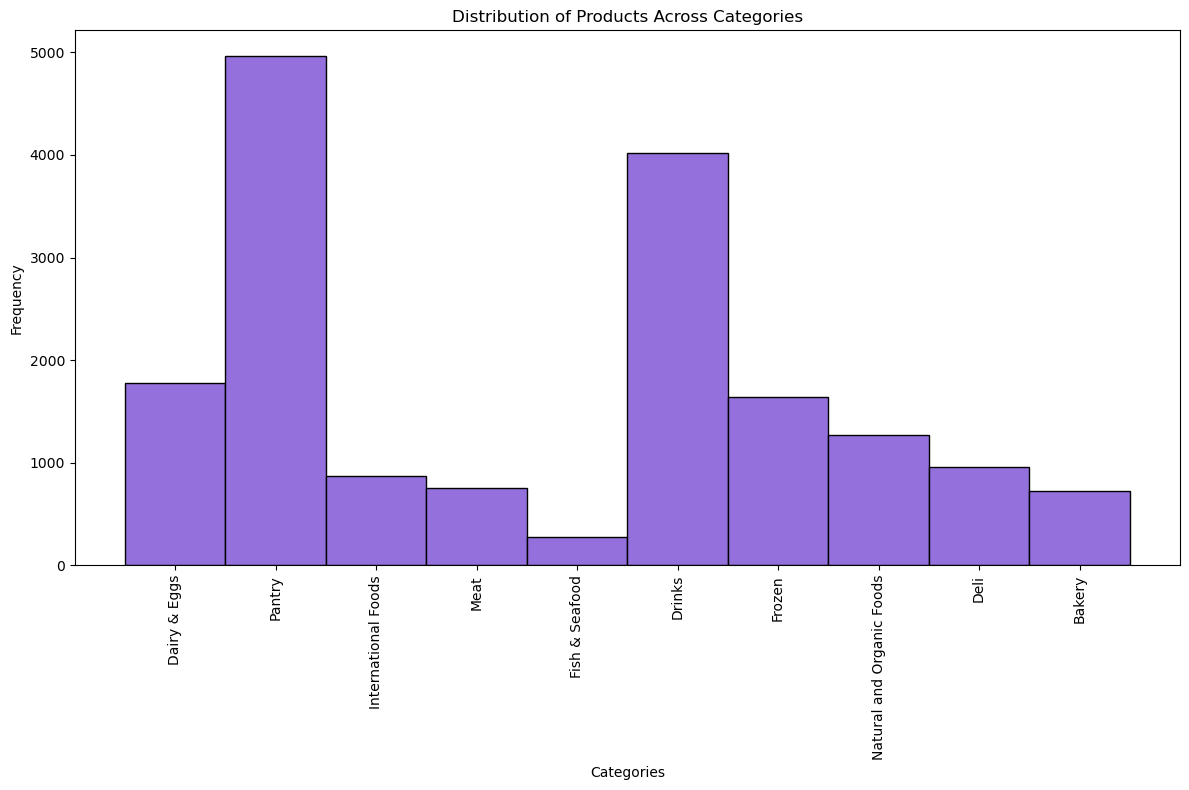

In [129]:
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(df['Category Group'], color='#9370DB', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Products Across Categories')
# Calculate the tick positions to match bin centers
tick_positions = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
plt.xticks(tick_positions, rotation=90)
plt.tight_layout()
plt.show()

The histogram provides valuable insights into our dataset. Notably, the Pantry and Drinks categories stand out with the highest product counts, both exceeding 4,000 items—an impressive quantity. However, when it comes to price ranges, these categories exhibit average figures compared to the Meat and Frozen categories.

Conversely, the Fish and Seafood category appears as the least frequent, with fewer than 500 product observations. In contrast, the Pantry category boasts the largest presence, with just under 5,000 products.

While this initial analysis offers useful insights, more detailed data collection may be necessary for in-depth exploration and further conclusions.